<a href="https://colab.research.google.com/github/harshesh/Self-Driving-Car/blob/master/Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


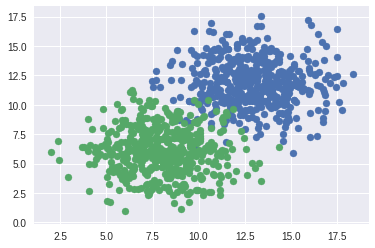

In [2]:
n_pts = 500
np.random.seed(0)
Xa = np.array([np.random.normal(13, 2, n_pts),
               np.random.normal(12, 2, n_pts)]).T
Xb = np.array([np.random.normal(8, 2, n_pts),
               np.random.normal(6, 2, n_pts)]).T

X = np.vstack((Xa, Xb))
y = np.matrix(np.append(np.zeros(n_pts), np.ones(n_pts))).T

plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])

In [3]:
model = Sequential()
model.add(Dense(units = 1, input_shape = (2,), activation = 'sigmoid'))
adam = Adam(lr = 0.1)
model.compile(adam, loss = 'binary_crossentropy', metrics = ['accuracy'])
h = model.fit(x = X, y = y, verbose = 1, batch_size = 50, epochs = 500, shuffle = 'true')

Epoch 1/500
1000/1000 [==============================] - 0s 164us/step - loss: 1.4227 - acc: 0.5550
Epoch 2/500
1000/1000 [==============================] - 0s 25us/step - loss: 0.6247 - acc: 0.6120
Epoch 3/500
1000/1000 [==============================] - 0s 27us/step - loss: 0.4458 - acc: 0.8290
Epoch 4/500
1000/1000 [==============================] - 0s 26us/step - loss: 0.3837 - acc: 0.8950
Epoch 5/500
1000/1000 [==============================] - 0s 25us/step - loss: 0.3406 - acc: 0.9050
Epoch 6/500
1000/1000 [==============================] - 0s 23us/step - loss: 0.3077 - acc: 0.9270
Epoch 7/500
1000/1000 [==============================] - 0s 24us/step - loss: 0.2884 - acc: 0.9320
Epoch 8/500
1000/1000 [==============================] - 0s 25us/step - loss: 0.2609 - acc: 0.9390
Epoch 9/500
1000/1000 [==============================] - 0s 28us/step - loss: 0.2346 - acc: 0.9580
Epoch 10/500
1000/1000 [==============================] - 0s 24us/step - loss: 0.2190 - acc: 0.9630
Epoch 11

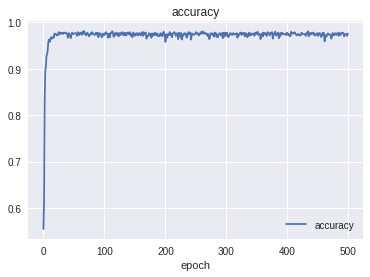

In [4]:
plt.plot(h.history['acc'])
plt.title('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy'])

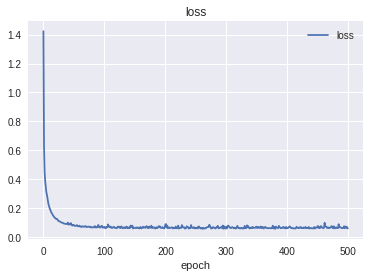

In [5]:
plt.plot(h.history['loss'])
plt.title('loss')
plt.xlabel('epoch')
plt.legend(['loss'])

In [0]:
def plot_decision_boundary(X, y, model):
    x_span = np.linspace(min(X[:, 0]) - 1, max(X[:, 0]) + 1)
    y_span = np.linspace(min(X[:, 1]) - 1, max(X[:, 1]) + 1)
    xx, yy = np.meshgrid(x_span, y_span)
    xx_, yy_ = xx.ravel(), yy.ravel()
    grid = np.c_[xx_, yy_]
    pre_func = model.predict(grid)
    z = pre_func.reshape(xx.shape)
    plt.contourf(xx, yy, z)

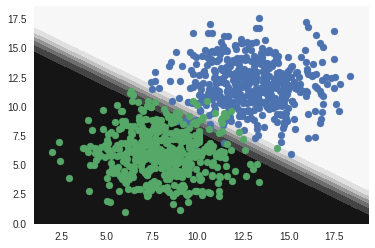

In [7]:
plot_decision_boundary(X, y, model)
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])
